<a href="https://colab.research.google.com/github/tahanial1/tahanial1/blob/main/Dynamics_of_parking_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

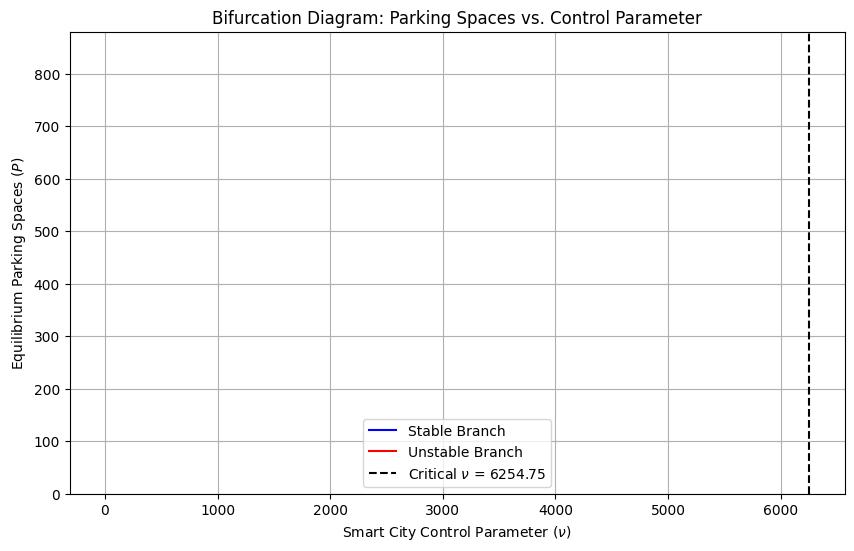

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

# Parameters
params = {
    'r': 0.025,      # Growth rate [day⁻¹]
    'Pmax': 800,     # Max capacity [spaces]
    'c': 0.003,      # Parking rate [(spaces·shopper)⁻¹day⁻¹]
    'h': 0.05,       # Handling time [spaces/shopper]
    'γτB': 0.0015,   # Business interaction [day⁻¹]
    'μ': 0.03        # Attrition rate [day⁻¹]
}

# Equilibrium equation: dP/dt = 0
def equilibrium_equation(P, ν, params):
    r, Pmax, c, h, γτB = params['r'], params['Pmax'], params['c'], params['h'], params['γτB']
    # Introduce a non-linear term to create a curve
    return r * P * (1 - P / Pmax) - (c * ν * P**2) / (1 + h * P) + γτB * ν

# Bifurcation analysis
ν_values = np.linspace(0, 1, 500)  # Range of ν
P_equilibria = []

for ν in ν_values:
    # Find all possible roots using different initial guesses
    initial_guesses = [1, 400, 800]  # Low, medium, high P
    roots = set()

    for guess in initial_guesses:
        try:
            sol = fsolve(equilibrium_equation, guess, args=(ν, params), full_output=True)
            if sol[2] == 1:  # Check if solution converged
                P_sol = sol[0][0]
                # Only keep real, positive, and feasible roots
                if np.isreal(P_sol) and 0 <= P_sol <= params['Pmax']:
                    roots.add(P_sol.real)  # Ensure real part
        except:
            pass

    # Store roots for this ν
    if roots:
        P_equilibria.append(sorted(roots))  # Sort for plotting
    else:
        P_equilibria.append([np.nan])

# Calculate ν_crit (critical point)
r, μ, c, γτB, h, Pmax = params['r'], params['μ'], params['c'], params['γτB'], params['h'], params['Pmax']
ν_crit = (r * μ) / (c * γτB) * (1 + np.sqrt(1 + h * Pmax / μ))

# Plotting
plt.figure(figsize=(10, 6))

# Plot stable and unstable branches
for i in range(len(P_equilibria)):
    if not np.isnan(P_equilibria[i][0]):
        plt.plot(ν_values[i], P_equilibria[i][0], 'b-', markersize=2, label='Stable Branch' if i == 0 else "")
    if len(P_equilibria[i]) > 1 and not np.isnan(P_equilibria[i][1]):
        plt.plot(ν_values[i], P_equilibria[i][1], 'r-', markersize=2, label='Unstable Branch' if i == 0 else "")

plt.axvline(ν_crit, color='k', linestyle='--',
            label=f'Critical $ν$ = {ν_crit:.2f}')

plt.xlabel('Smart City Control Parameter ($ν$)')
plt.ylabel('Equilibrium Parking Spaces ($P$)')
plt.title('Bifurcation Diagram: Parking Spaces vs. Control Parameter')
plt.grid(True)
plt.legend()
plt.ylim(0, params['Pmax'] * 1.1)

plt.savefig('bifurcation_diagram_final.png', dpi=300)
plt.show()


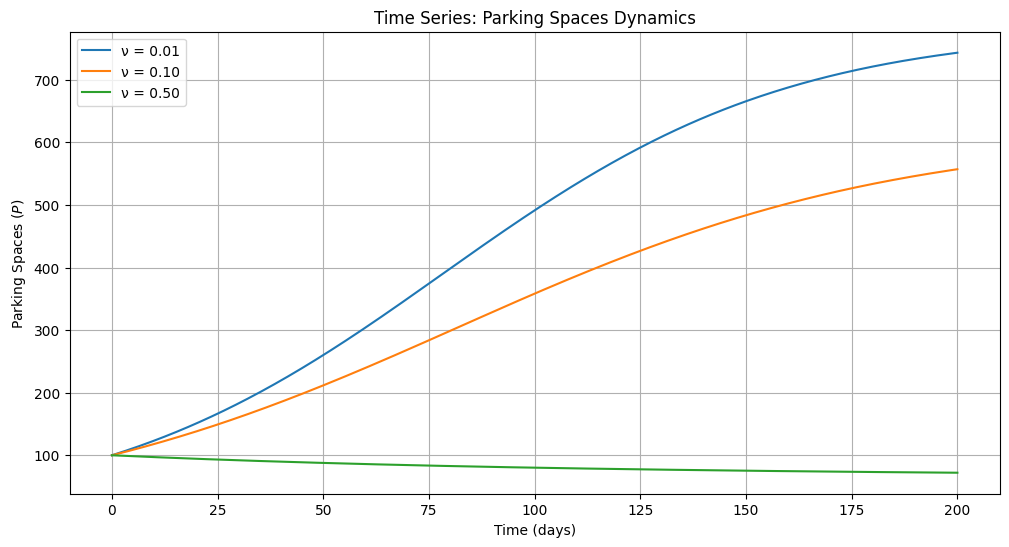

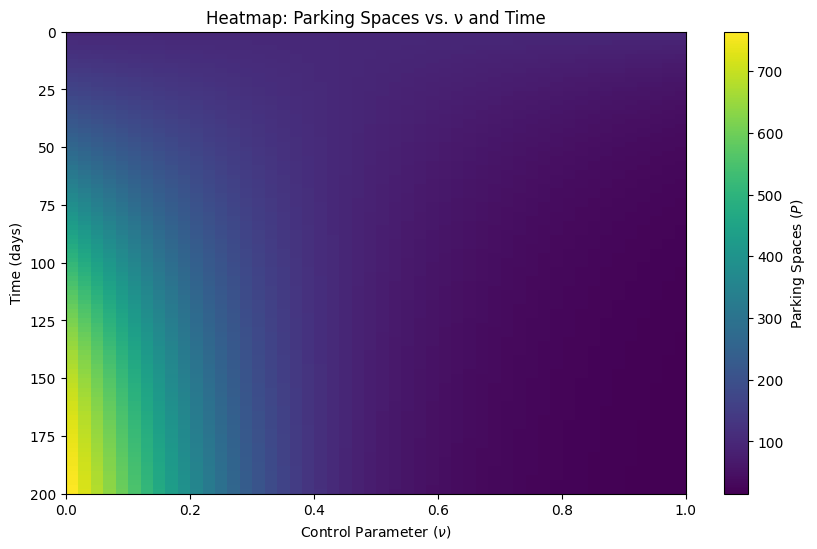

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from matplotlib.colors import LinearSegmentedColormap

# Parameters
params = {
    'r': 0.025,      # Growth rate [day⁻¹]
    'Pmax': 800,     # Max capacity [spaces]
    'c': 0.003,      # Parking rate [(spaces·shopper)⁻¹day⁻¹]
    'h': 0.05,       # Handling time [spaces/shopper]
    'γτB': 0.0015,   # Business interaction [day⁻¹]
    'μ': 0.03        # Attrition rate [day⁻¹]
}

# Differential equation: dP/dt = f(P, ν)
def parking_dynamics(t, P, ν, params):
    r, Pmax, c, h, γτB = params['r'], params['Pmax'], params['c'], params['h'], params['γτB']
    return r * P * (1 - P / Pmax) - (c * ν * P**2) / (1 + h * P) + γτB * ν

# Time span and initial condition
t_span = (0, 200)  # Simulate for 200 days
P0 = 100            # Initial parking spaces

# Choose ν values (low, critical, high)
ν_values = [0.01, 0.1, 0.5]  # Example values (adjust as needed)

# Time series simulation
plt.figure(figsize=(12, 6))
for ν in ν_values:
    sol = solve_ivp(parking_dynamics, t_span, [P0], args=(ν, params),
                    t_eval=np.linspace(t_span[0], t_span[1], 500))
    plt.plot(sol.t, sol.y[0], label=f'ν = {ν:.2f}')

plt.xlabel('Time (days)')
plt.ylabel('Parking Spaces ($P$)')
plt.title('Time Series: Parking Spaces Dynamics')
plt.legend()
plt.grid(True)
plt.show()

# Heatmap: P(t, ν)
ν_range = np.linspace(0, 1, 50)  # Range of ν values
t_range = np.linspace(0, 200, 100)  # Time points
P_heatmap = np.zeros((len(t_range), len(ν_range)))

for i, ν in enumerate(ν_range):
    sol = solve_ivp(parking_dynamics, (0, 200), [P0], args=(ν, params),
                    t_eval=t_range)
    P_heatmap[:, i] = sol.y[0]

# Plot heatmap
plt.figure(figsize=(10, 6))
plt.imshow(P_heatmap, aspect='auto', cmap='viridis',
           extent=[ν_range.min(), ν_range.max(), t_range.max(), t_range.min()])
plt.colorbar(label='Parking Spaces ($P$)')
plt.xlabel('Control Parameter ($ν$)')
plt.ylabel('Time (days)')
plt.title('Heatmap: Parking Spaces vs. ν and Time')
plt.show()

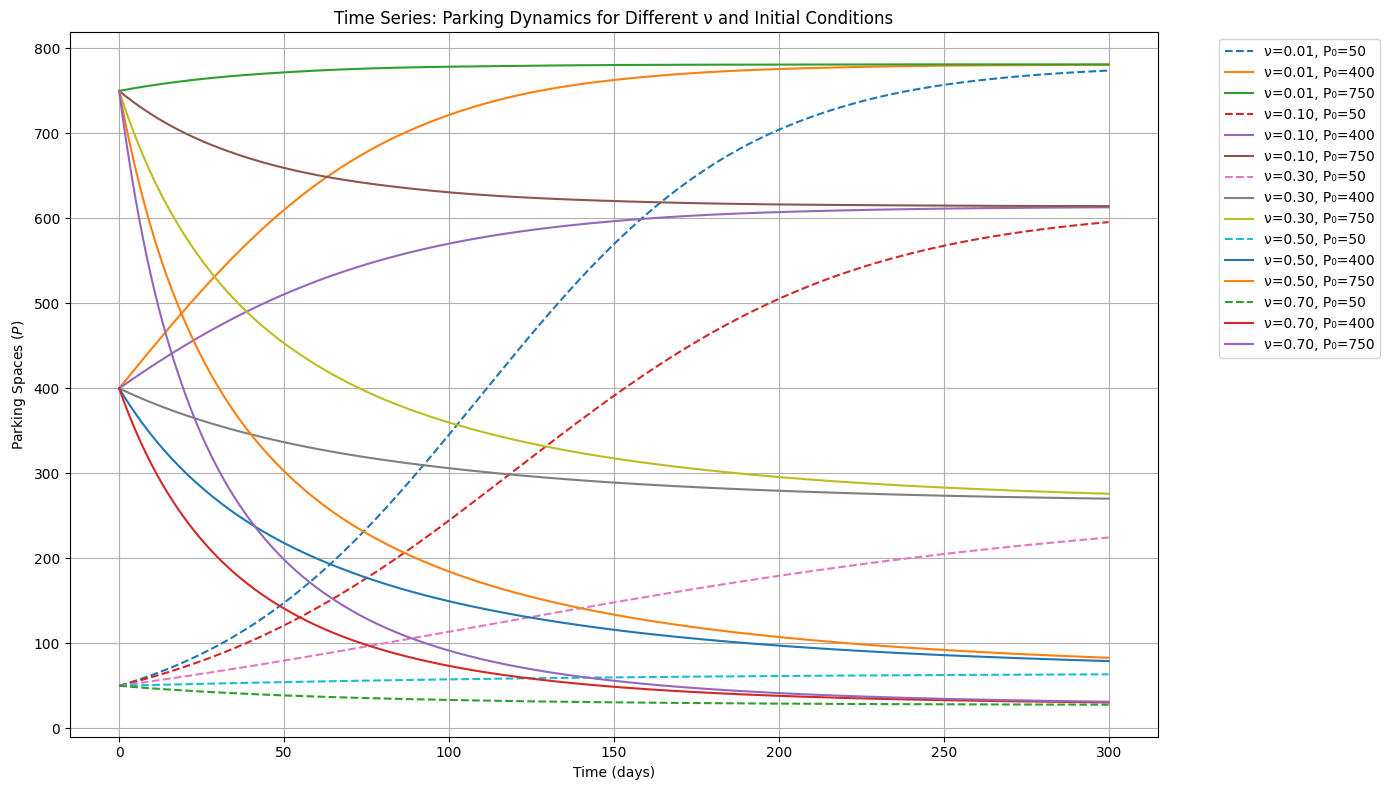

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from matplotlib.colors import LinearSegmentedColormap

# Parameters
params = {
    'r': 0.025,      # Growth rate [day⁻¹]
    'Pmax': 800,     # Max capacity [spaces]
    'c': 0.003,      # Parking rate [(spaces·shopper)⁻¹day⁻¹]
    'h': 0.05,       # Handling time [spaces/shopper]
    'γτB': 0.0015,   # Business interaction [day⁻¹]
    'μ': 0.03        # Attrition rate [day⁻¹]
}

# Differential equation: dP/dt = f(P, ν)
def parking_dynamics(t, P, ν, params):
    r, Pmax, c, h, γτB = params['r'], params['Pmax'], params['c'], params['h'], params['γτB']
    return r * P * (1 - P / Pmax) - (c * ν * P**2) / (1 + h * P) + γτB * ν

# Time span and initial conditions
t_span = (0, 300)  # Simulate for 300 days
P0_values = [50, 400, 750]  # Low, medium, high initial parking

# ν values (subcritical, critical, supercritical)
ν_values = [0.01, 0.1, 0.3, 0.5, 0.7]

# Time series simulation
plt.figure(figsize=(14, 8))
for ν in ν_values:
    for P0 in P0_values:
        sol = solve_ivp(parking_dynamics, t_span, [P0], args=(ν, params),
                        t_eval=np.linspace(t_span[0], t_span[1], 1000))
        plt.plot(sol.t, sol.y[0], '--' if P0 == 50 else '-',
                label=f'ν={ν:.2f}, P₀={P0}')

plt.xlabel('Time (days)')
plt.ylabel('Parking Spaces ($P$)')
plt.title('Time Series: Parking Dynamics for Different ν and Initial Conditions')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

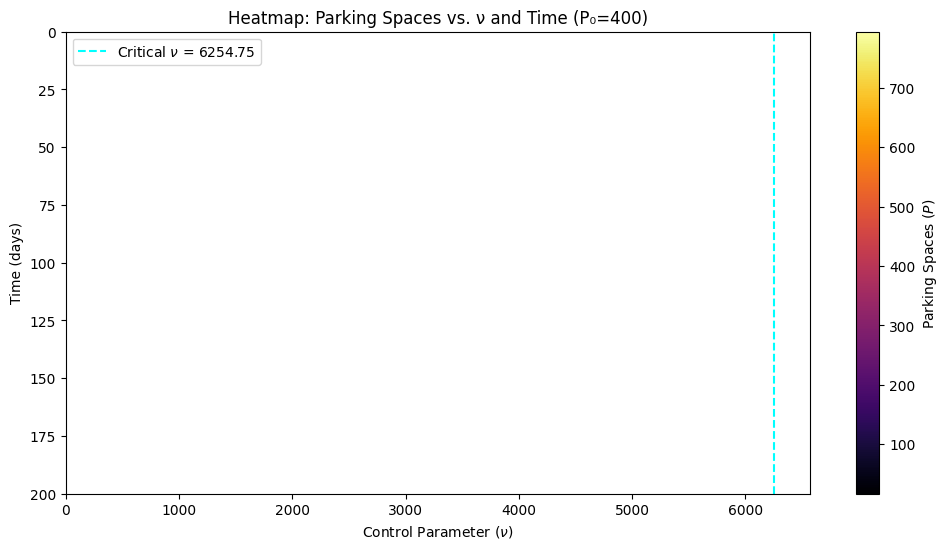

In [9]:
# Heatmap: P(t, ν)
ν_range = np.linspace(0, 1, 100)  # Finer ν resolution
t_range = np.linspace(0, 200, 200)  # Finer time resolution
P_heatmap = np.zeros((len(t_range), len(ν_range)))

for i, ν in enumerate(ν_range):
    sol = solve_ivp(parking_dynamics, (0, 200), [400], args=(ν, params),
                    t_eval=t_range)
    P_heatmap[:, i] = sol.y[0]

# Critical ν calculation
r, μ, c, γτB, h, Pmax = params['r'], params['μ'], params['c'], params['γτB'], params['h'], params['Pmax']
ν_crit = (r * μ) / (c * γτB) * (1 + np.sqrt(1 + h * Pmax / μ))

# Plot heatmap
plt.figure(figsize=(12, 6))
plt.imshow(P_heatmap, aspect='auto', cmap='inferno',
           extent=[ν_range.min(), ν_range.max(), t_range.max(), t_range.min()])
plt.colorbar(label='Parking Spaces ($P$)')
plt.axvline(ν_crit, color='cyan', linestyle='--',
            label=f'Critical $ν$ = {ν_crit:.2f}')
plt.xlabel('Control Parameter ($ν$)')
plt.ylabel('Time (days)')
plt.title('Heatmap: Parking Spaces vs. ν and Time (P₀=400)')
plt.legend()
plt.show()

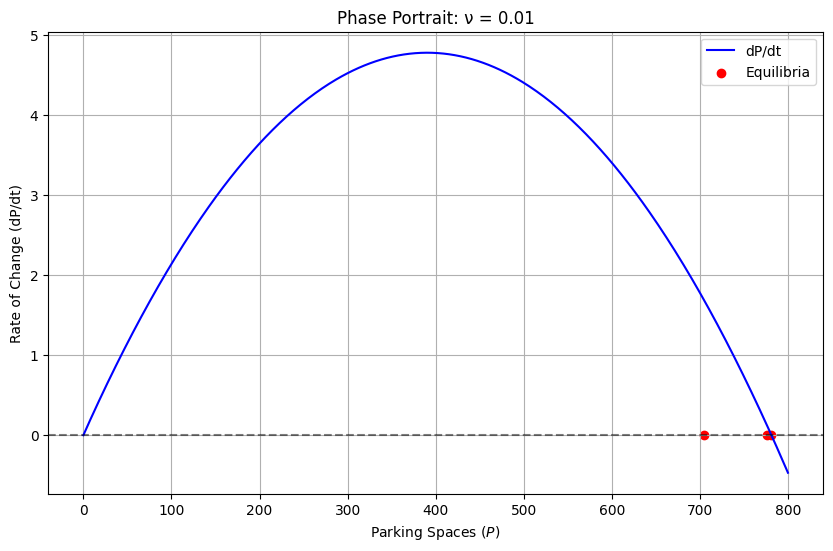

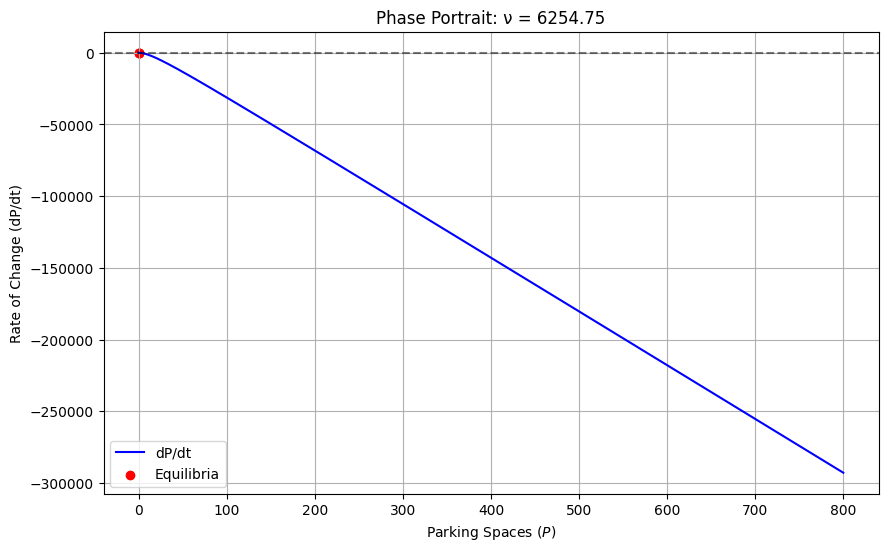

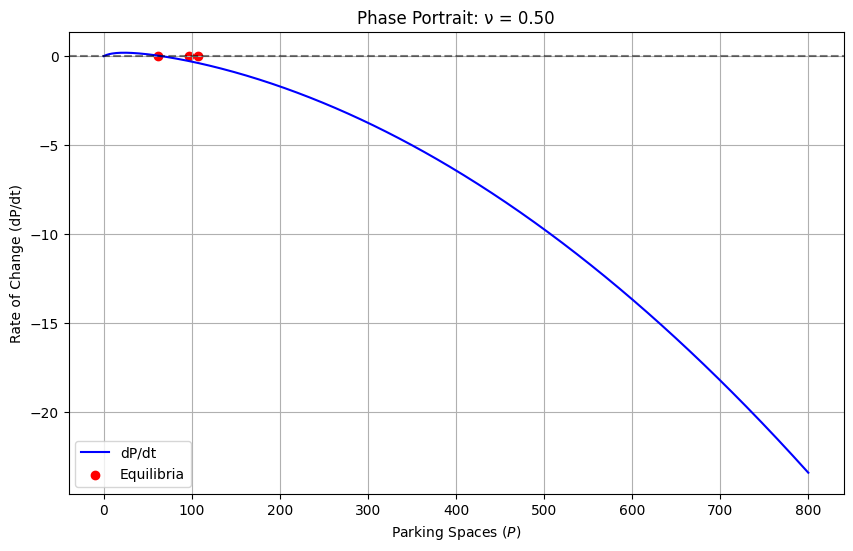

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from matplotlib.colors import LinearSegmentedColormap

# Parameters
params = {
    'r': 0.025,      # Growth rate [day⁻¹]
    'Pmax': 800,     # Max capacity [spaces]
    'c': 0.003,      # Parking rate [(spaces·shopper)⁻¹day⁻¹]
    'h': 0.05,       # Handling time [spaces/shopper]
    'γτB': 0.0015,   # Business interaction [day⁻¹]
    'μ': 0.03        # Attrition rate [day⁻¹]
}

# Differential equation: dP/dt = f(P, ν)
def parking_dynamics(t, P, ν, params):
    r, Pmax, c, h, γτB = params['r'], params['Pmax'], params['c'], params['h'], params['γτB']
    return r * P * (1 - P / Pmax) - (c * ν * P**2) / (1 + h * P) + γτB * ν

# Phase portrait: dP/dt vs P for fixed ν
def plot_phase_portrait(ν, params):
    P_values = np.linspace(0, params['Pmax'], 500)
    dPdt = [parking_dynamics(0, P, ν, params) for P in P_values]

    # Find equilibrium points (where dP/dt ≈ 0)
    equilibrium_P = []
    for P0 in [50, 400, 750]:  # Test different initial conditions
        sol = solve_ivp(parking_dynamics, (0, 200), [P0], args=(ν, params))
        equilibrium_P.append(sol.y[0][-1])  # Take the last value (equilibrium)

    plt.figure(figsize=(10, 6))
    plt.plot(P_values, dPdt, 'b-', label='dP/dt')
    plt.axhline(0, color='k', linestyle='--', alpha=0.5)
    plt.scatter(equilibrium_P, [0]*len(equilibrium_P), color='r', label='Equilibria')
    plt.xlabel('Parking Spaces ($P$)')
    plt.ylabel('Rate of Change (dP/dt)')
    plt.title(f'Phase Portrait: ν = {ν:.2f}')
    plt.grid(True)
    plt.legend()
    plt.show()

# Critical ν calculation
r, μ, c, γτB, h, Pmax = params['r'], params['μ'], params['c'], params['γτB'], params['h'], params['Pmax']
ν_crit = (r * μ) / (c * γτB) * (1 + np.sqrt(1 + h * Pmax / μ))

# Generate phase portraits for key ν values
for ν in [0.01, ν_crit, 0.5]:
    plot_phase_portrait(ν, params)

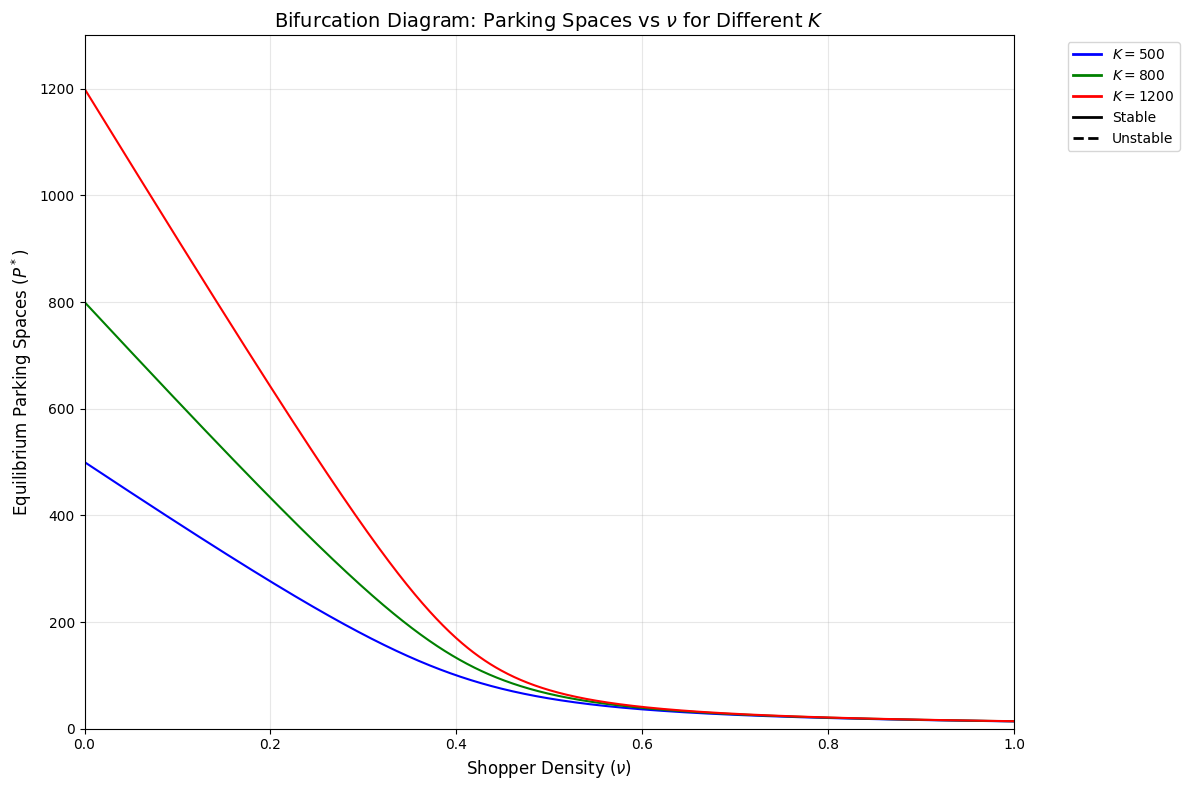

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
params = {
    'r': 0.025,      # Growth rate [day⁻¹]
    'c': 0.003,      # Parking rate [(spaces·shopper)⁻¹day⁻¹]
    'h': 0.05,       # Handling time [spaces/shopper]
    'γτB': 0.0015    # Business interaction [day⁻¹]
}

# Define K (Pmax) values to analyze
K_values = [500, 800, 1200]
colors = ['blue', 'green', 'red']  # Colors for each K
ν_range = np.linspace(0, 1, 1000)  # Shopper density range

plt.figure(figsize=(12, 8))

# Loop over each K value
for K_idx, K in enumerate(K_values):
    # Extract parameters
    r, c, h, γτB = params['r'], params['c'], params['h'], params['γτB']

    # Store branches: 0 = smallest root, 1 = middle, 2 = largest
    branches = {0: {'ν': [], 'P': [], 'stable': []},
                1: {'ν': [], 'P': [], 'stable': []},
                2: {'ν': [], 'P': [], 'stable': []}}

    # Loop over ν values
    for ν in ν_range:
        # Coefficients of cubic: a*P^3 + b*P^2 + c*P + d = 0
        a = - (r * h) / K
        b = r*h - r/K - c*ν
        c_val = r + γτB*ν*h
        d_val = γτB*ν

        # Solve cubic equation
        roots = np.roots([a, b, c_val, d_val])
        real_roots = []

        # Filter real roots in [0, K]
        for root in roots:
            if np.isreal(root):
                P_val = np.real(root)
                if 0 <= P_val <= K:
                    real_roots.append(P_val)

        # Remove duplicates and sort
        real_roots = sorted(set(real_roots))

        # Check stability for each root
        stabilities = []
        for P_val in real_roots:
            # Jacobian evaluation
            term1 = r * (1 - 2*P_val/K)
            numerator = 2*c*ν*P_val + c*ν*h*P_val**2
            denominator = (1 + h*P_val)**2
            term2 = numerator / denominator
            J = term1 - term2
            stabilities.append(J < 0)  # True if stable

        # Assign roots to branches (sorted: smallest, middle, largest)
        for i, (P_val, stable) in enumerate(zip(real_roots, stabilities)):
            if i < 3:  # Max 3 branches
                branches[i]['ν'].append(ν)
                branches[i]['P'].append(P_val)
                branches[i]['stable'].append(stable)

    # Plot each branch with stability
    for branch_idx in range(3):
        ν_vals = branches[branch_idx]['ν']
        P_vals = branches[branch_idx]['P']
        stable_flags = branches[branch_idx]['stable']

        if not ν_vals:
            continue  # Skip empty branches

        # Split into segments of consecutive stability
        segments = []
        current_segment = {'ν': [], 'P': [], 'stable': stable_flags[0]}

        for i in range(len(ν_vals)):
            if stable_flags[i] == current_segment['stable']:
                current_segment['ν'].append(ν_vals[i])
                current_segment['P'].append(P_vals[i])
            else:
                segments.append(current_segment)
                current_segment = {
                    'ν': [ν_vals[i]],
                    'P': [P_vals[i]],
                    'stable': stable_flags[i]
                }
        segments.append(current_segment)

        # Plot each segment
        for seg in segments:
            linestyle = 'solid' if seg['stable'] else 'dashed'
            plt.plot(seg['ν'], seg['P'],
                     linestyle=linestyle,
                     color=colors[K_idx],
                     lw=1.5)

# Plot settings
plt.xlabel('Shopper Density ($\\nu$)', fontsize=12)
plt.ylabel('Equilibrium Parking Spaces ($P^*$)', fontsize=12)
plt.title('Bifurcation Diagram: Parking Spaces vs $\\nu$ for Different $K$', fontsize=14)
plt.grid(True, alpha=0.3)

# Custom legend
from matplotlib.lines import Line2D
legend_elements = [
    Line2D([0], [0], color='blue', lw=2, label='$K=500$'),
    Line2D([0], [0], color='green', lw=2, label='$K=800$'),
    Line2D([0], [0], color='red', lw=2, label='$K=1200$'),
    Line2D([0], [0], color='black', ls='solid', lw=2, label='Stable'),
    Line2D([0], [0], color='black', ls='dashed', lw=2, label='Unstable')
]
plt.legend(handles=legend_elements, loc='upper left', bbox_to_anchor=(1.05, 1))

plt.xlim(0, 1)
plt.ylim(0, 1300)
plt.tight_layout()
plt.show()

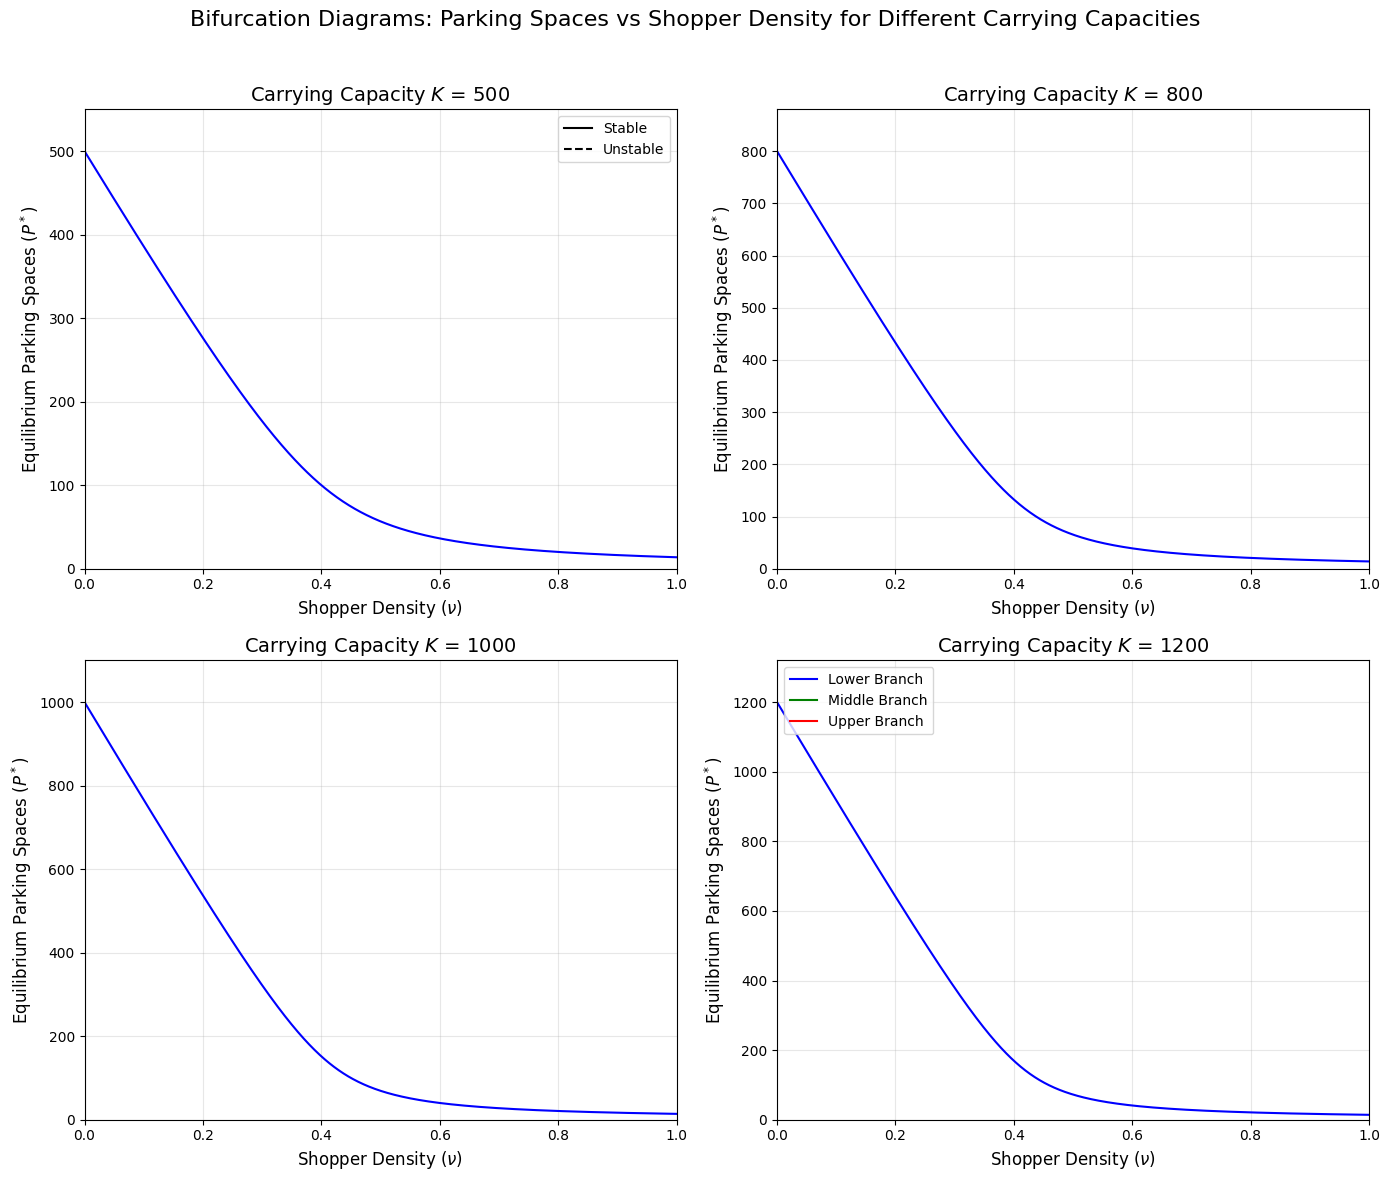

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Parameters
params = {
    'r': 0.025,      # Growth rate [day⁻¹]
    'c': 0.003,      # Parking rate [(spaces·shopper)⁻¹day⁻¹]
    'h': 0.05,       # Handling time [spaces/shopper]
    'γτB': 0.0015    # Business interaction [day⁻¹]
}

# Define K (Pmax) values to analyze
K_values = [500, 800, 1000, 1200]  # Four different carrying capacities
ν_range = np.linspace(0, 1, 1000)  # Shopper density range

# Create figure with 2x2 subplots
fig, axs = plt.subplots(2, 2, figsize=(14, 12))
fig.suptitle('Bifurcation Diagrams: Parking Spaces vs Shopper Density for Different Carrying Capacities',
             fontsize=16, y=0.98)

# Loop over each K value
for idx, K in enumerate(K_values):
    # Get current axis position
    ax = axs[idx//2, idx%2]

    # Extract parameters
    r, c, h, γτB = params['r'], params['c'], params['h'], params['γτB']

    # Store branches: 0 = smallest root, 1 = middle, 2 = largest
    branches = {0: {'ν': [], 'P': [], 'stable': []},
                1: {'ν': [], 'P': [], 'stable': []},
                2: {'ν': [], 'P': [], 'stable': []}}

    # Loop over ν values
    for ν in ν_range:
        # Coefficients of cubic: a*P^3 + b*P^2 + c*P + d = 0
        a = - (r * h) / K
        b = r*h - r/K - c*ν
        c_val = r + γτB*ν*h
        d_val = γτB*ν

        # Solve cubic equation
        roots = np.roots([a, b, c_val, d_val])
        real_roots = []

        # Filter real roots in [0, K]
        for root in roots:
            if np.isreal(root):
                P_val = np.real(root)
                if 0 <= P_val <= K:
                    real_roots.append(P_val)

        # Remove duplicates and sort
        real_roots = sorted(set(real_roots))

        # Check stability for each root
        stabilities = []
        for P_val in real_roots:
            # Jacobian evaluation
            term1 = r * (1 - 2*P_val/K)
            numerator = 2*c*ν*P_val + c*ν*h*P_val**2
            denominator = (1 + h*P_val)**2
            term2 = numerator / denominator
            J = term1 - term2
            stabilities.append(J < 0)  # True if stable

        # Assign roots to branches (sorted: smallest, middle, largest)
        for i, (P_val, stable) in enumerate(zip(real_roots, stabilities)):
            if i < 3:  # Max 3 branches
                branches[i]['ν'].append(ν)
                branches[i]['P'].append(P_val)
                branches[i]['stable'].append(stable)

    # Plot each branch with stability
    for branch_idx in range(3):
        ν_vals = branches[branch_idx]['ν']
        P_vals = branches[branch_idx]['P']
        stable_flags = branches[branch_idx]['stable']

        if not ν_vals:
            continue  # Skip empty branches

        # Split into segments of consecutive stability
        segments = []
        current_segment = {'ν': [], 'P': [], 'stable': stable_flags[0]}

        for i in range(len(ν_vals)):
            if stable_flags[i] == current_segment['stable']:
                current_segment['ν'].append(ν_vals[i])
                current_segment['P'].append(P_vals[i])
            else:
                segments.append(current_segment)
                current_segment = {
                    'ν': [ν_vals[i]],
                    'P': [P_vals[i]],
                    'stable': stable_flags[i]
                }
        segments.append(current_segment)

        # Plot each segment
        for seg in segments:
            linestyle = '-' if seg['stable'] else '--'
            color = 'blue' if branch_idx == 0 else 'green' if branch_idx == 1 else 'red'
            ax.plot(seg['ν'], seg['P'], linestyle=linestyle, color=color, lw=1.5)

    # Plot settings for each subplot
    ax.set_title(f'Carrying Capacity $K$ = {K}', fontsize=14)
    ax.set_xlabel('Shopper Density ($\\nu$)', fontsize=12)
    ax.set_ylabel('Equilibrium Parking Spaces ($P^*$)', fontsize=12)
    ax.grid(True, alpha=0.3)
    ax.set_xlim(0, 1)
    ax.set_ylim(0, K*1.1)

    # Add stability legend to first subplot only
    if idx == 0:
        stable_line = plt.Line2D([], [], color='black', linestyle='-', label='Stable')
        unstable_line = plt.Line2D([], [], color='black', linestyle='--', label='Unstable')
        ax.legend(handles=[stable_line, unstable_line], loc='upper right')

# Add branch color legend to last subplot
blue_patch = plt.Line2D([], [], color='blue', label='Lower Branch')
green_patch = plt.Line2D([], [], color='green', label='Middle Branch')
red_patch = plt.Line2D([], [], color='red', label='Upper Branch')
axs[1, 1].legend(handles=[blue_patch, green_patch, red_patch], loc='upper left')

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust for suptitle
plt.show()

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import os

# Parameters
params = {
    'r': 0.025,      # Growth rate [day⁻¹]
    'c': 0.003,      # Parking rate [(spaces·shopper)⁻¹day⁻¹]
    'h': 0.05,       # Handling time [spaces/shopper]
    'γτB': 0.0015    # Business interaction [day⁻¹]
}

# Define K (Pmax) values to analyze
K_values = [500, 800, 1000, 1200]
ν_range = np.linspace(0, 1, 1000)  # Shopper density range

# Create output directory if it doesn't exist
output_dir = "bifurcation_diagrams"
os.makedirs(output_dir, exist_ok=True)

# Loop over each K value
for K in K_values:
    # Create a new figure for each K
    fig = plt.figure(figsize=(10, 8))

    # Extract parameters
    r, c, h, γτB = params['r'], params['c'], params['h'], params['γτB']

    # Store branches: 0 = smallest root, 1 = middle, 2 = largest
    branches = {0: {'ν': [], 'P': [], 'stable': []},
                1: {'ν': [], 'P': [], 'stable': []},
                2: {'ν': [], 'P': [], 'stable': []}}

    # Loop over ν values
    for ν in ν_range:
        # Coefficients of cubic: a*P^3 + b*P^2 + c*P + d = 0
        a = - (r * h) / K
        b = r*h - r/K - c*ν
        c_val = r + γτB*ν*h
        d_val = γτB*ν

        # Solve cubic equation
        roots = np.roots([a, b, c_val, d_val])
        real_roots = []

        # Filter real roots in [0, K]
        for root in roots:
            if np.isreal(root):
                P_val = np.real(root)
                if 0 <= P_val <= K:
                    real_roots.append(P_val)

        # Remove duplicates and sort
        real_roots = sorted(set(real_roots))

        # Check stability for each root
        stabilities = []
        for P_val in real_roots:
            # Jacobian evaluation
            term1 = r * (1 - 2*P_val/K)
            numerator = 2*c*ν*P_val + c*ν*h*P_val**2
            denominator = (1 + h*P_val)**2
            term2 = numerator / denominator
            J = term1 - term2
            stabilities.append(J < 0)  # True if stable

        # Assign roots to branches (sorted: smallest, middle, largest)
        for i, (P_val, stable) in enumerate(zip(real_roots, stabilities)):
            if i < 3:  # Max 3 branches
                branches[i]['ν'].append(ν)
                branches[i]['P'].append(P_val)
                branches[i]['stable'].append(stable)

    # Plot each branch with stability
    for branch_idx in range(3):
        ν_vals = branches[branch_idx]['ν']
        P_vals = branches[branch_idx]['P']
        stable_flags = branches[branch_idx]['stable']

        if not ν_vals:
            continue  # Skip empty branches

        # Split into segments of consecutive stability
        segments = []
        current_segment = {'ν': [], 'P': [], 'stable': stable_flags[0]}

        for i in range(len(ν_vals)):
            if stable_flags[i] == current_segment['stable']:
                current_segment['ν'].append(ν_vals[i])
                current_segment['P'].append(P_vals[i])
            else:
                segments.append(current_segment)
                current_segment = {
                    'ν': [ν_vals[i]],
                    'P': [P_vals[i]],
                    'stable': stable_flags[i]
                }
        segments.append(current_segment)

        # Plot each segment
        for seg in segments:
            linestyle = '-' if seg['stable'] else '--'
            color = 'blue' if branch_idx == 0 else 'green' if branch_idx == 1 else 'red'
            plt.plot(seg['ν'], seg['P'], linestyle=linestyle, color=color, lw=1.5)

    # Plot settings
    plt.title(f'Bifurcation Diagram: $K$ = {K}', fontsize=16)
    plt.xlabel('Shopper Density ($\\nu$)', fontsize=14)
    plt.ylabel('Equilibrium Parking Spaces ($P^*$)', fontsize=14)
    plt.grid(True, alpha=0.3)
    plt.xlim(0, 1)
    plt.ylim(0, K*1.1)

    # Add legends
    blue_patch = plt.Line2D([], [], color='blue', label='Lower Branch')
    green_patch = plt.Line2D([], [], color='green', label='Middle Branch')
    red_patch = plt.Line2D([], [], color='red', label='Upper Branch')
    stable_line = plt.Line2D([], [], color='black', linestyle='-', label='Stable')
    unstable_line = plt.Line2D([], [], color='black', linestyle='--', label='Unstable')

    plt.legend(handles=[blue_patch, green_patch, red_patch, stable_line, unstable_line],
               loc='upper right', fontsize=10)

    # Save the figure
    filename = os.path.join(output_dir, f'bifurcation_K{K}.png')
    plt.savefig(filename, dpi=300, bbox_inches='tight')
    print(f'Saved: {filename}')

    # Close the figure to free memory
    plt.close(fig)

print("All bifurcation diagrams saved successfully!")

Saved: bifurcation_diagrams/bifurcation_K500.png
Saved: bifurcation_diagrams/bifurcation_K800.png
Saved: bifurcation_diagrams/bifurcation_K1000.png
Saved: bifurcation_diagrams/bifurcation_K1200.png
All bifurcation diagrams saved successfully!


# New section